# Time series visualisation and exploration

This notebook illustrates the visualisation of a single time series. We'll load some data as a pandas dataframe and plot the time series subsequently using matplotlib.

We'll explore the time series of three sites: 

- Tropical forest in the Amazon
- Cropland area in Ethiopia
- Disturbed forest in Portugal
- Deciduous forest in Belgium


In [98]:
from datetime import datetime
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import datetime
import pandas as pd

### **Load data**

Let's first load an LAI time series over one of the areas as a pandas dataframe. 

In [99]:
# Import the time series as a pandas dataframe
dat = pd.read_csv('./data/A_visualisation/area_A.csv')

#Let's have a look at the dataset
print(dat)

           Date  area_A - LAI
0    10-01-2015          0.22
1    20-01-2015          0.19
2    31-01-2015          0.18
3    10-02-2015          0.16
4    20-02-2015          0.14
..          ...           ...
248  30-11-2021          0.36
249  10-12-2021          0.29
250  20-12-2021          0.24
251  31-12-2021          0.20
252  10-01-2022          0.17

[253 rows x 2 columns]


### **Plot time series**

We'll now plot the time series in blue using both point markers and lines connecting the observations. 

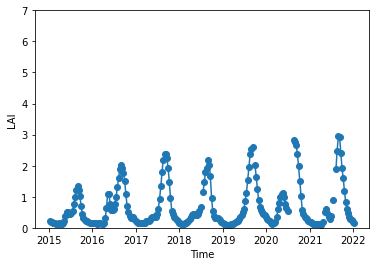

In [100]:
x = [datetime.strptime(x, '%d-%m-%Y') for x in dat['Date']]
y = dat['area_A - LAI']

plt.plot(x,y,'o-') # the 'o-' indicates that both point markers as well as lines should be plotted
plt.xlabel('Time') # this sets the x label
plt.ylabel('LAI') # this sets the y label
plt.ylim([0,7])
plt.show()

### **Plot stacked years**

To facilitate the comparison of individual years, each year of the time series is sometimes plotted on top of each other. In addition, the average seasonal pattern and the inter-annual standard deviation can be plotted to visualize the seasonal shape and its variability amongst years.



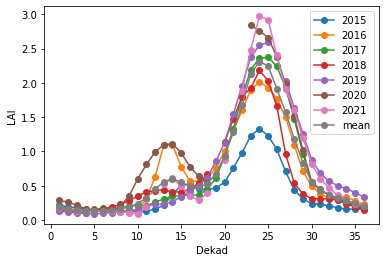

In [101]:
mean_yrs = np.nanmean(np.array(y[:-1]).reshape(-1,36), axis=0)
std_yrs = np.nanstd(np.array(y[:-1]).reshape(-1,36), axis=0)

for i in range(7):
    plt.plot(np.arange(1,37),y[(i*36):((i+1)*36)],'o-') 
plt.plot(np.arange(1,37),mean_yrs,'o-')
plt.legend(['2015', '2016', '2017','2018', '2019', '2020','2021','mean'])
plt.xlabel('Dekad') # this sets the x label
plt.ylabel('LAI') # this sets the y label
plt.show()

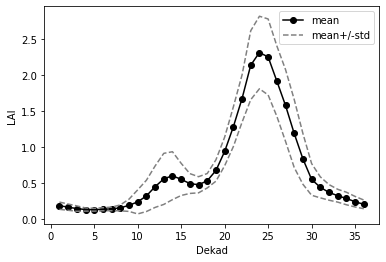

In [102]:
plt.plot(np.arange(1,37),mean_yrs,'o-k')
plt.plot(np.arange(1,37),mean_yrs+std_yrs,'--', color = 'gray')
plt.plot(np.arange(1,37),mean_yrs-std_yrs,'--', color = 'gray')
plt.legend(['mean', 'mean+/-std'])
plt.xlabel('Dekad') # this sets the x label
plt.ylabel('LAI') # this sets the y label
plt.show()

### **Now it's your turn:**

1. Plot the time series of the other areas available in the folder './data/A_visualisation/'.
2. Compare the inter-annual and intra-annual variability of the time series 
3. Do the time series differ a lot? In what respect? 
4. Which time series belongs to which land cover type? 